In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
konacna_tabela = pd.read_csv("konacna_tabela.csv")
konacna_tabela

,ID,Tip,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,...,TGC,TGG,TGT,TTA,TTC,TTG,TTT,Pocetak,Kraj,Velicina
0,NC_017626,C,991,597,601,748,566,499,563,429,...,802,786,656,589,798,658,1009,233779.0,275861.0,42082
1,NC_017626,C,1455,1371,807,1185,1196,1234,1191,851,...,1490,1273,860,929,1201,969,1395,2272389.0,2345178.0,72789
2,NC_017626,C,1058,555,443,988,462,301,214,424,...,380,278,417,762,656,517,1178,3249573.0,3277026.0,27453
3,NC_017626,C,589,393,311,435,401,335,257,295,...,402,315,334,331,465,287,489,3387125.0,3408657.0,21532
4,NC_017626,C,1577,1192,804,1389,917,1006,997,727,...,1273,935,861,1173,1314,993,1894,3429556.0,3495247.0,65691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,NC_017907,R,2472,1409,1229,1547,1418,1008,1087,1012,...,1587,1738,1313,1405,1321,1183,1872,0.0,83854.0,83854
755,NC_017652,K,118917,89834,68419,91041,65597,80681,78544,54796,...,102999,92260,65108,74986,91200,82784,119309,0.0,5038386.0,5038386
756,NC_017652,R,108887,82463,63082,83228,59076,74385,72637,49742,...,94947,85288,58964,68216,83589,76690,109253,0.0,4621056.0,4621056
757,NC_017651,K,118918,89834,68420,91040,65598,80682,78544,54795,...,102996,92261,65108,74986,91200,82784,119309,0.0,5038386.0,5038386


In [28]:
genoms = ['NC_017626', 'NC_017627', 'NC_013364', 'NC_013365', 'NC_013366', 'NC_013361', 'NC_013369', 
          'NC_013353', 'NC_013354', 'NC_018650', 'NC_018654', 'NC_018661', 'NC_018662', 'NC_018658', 
          'NC_018659', 'NC_018666', 'NC_008253', 'NC_011748', 'NC_017631', 'NC_008563', 'NC_009837', 
          'NC_009838', 'NC_020163', 'NC_010468', 'NC_012892', 'NC_012971', 'NC_013941', 'NC_017646', 
          'NC_004431', 'NC_017625', 'NC_017638', 'NC_011601', 'NC_009786', 'NC_009788', 'NC_009790', 
          'NC_009801', 'NC_011353', 'NC_011745', 'NC_002655', 'NC_007414', 'NC_017633', 'NC_012947', 
          'NC_009800', 'NC_011741', 'NC_011750', 'NC_017628', 'NC_007779', 'NC_010473', 'NC_012759', 
          'NC_020518', 'NC_000913', 'NC_016902', 'NC_016904', 'NC_017660', 'NC_011993', 'NC_022364', 
          'NC_017644', 'NC_017634', 'NC_017659', 'NC_017663', 'NC_022370', 'NC_012967', 'NC_017656', 
          'NC_017657', 'NC_011742', 'NC_011747', 'NC_011415', 'NC_011419', 'NC_013654', 'NC_013655', 
          'NC_010488', 'NC_010498', 'NC_002128', 'NC_002695', 'NC_013008', 'NC_013010', 'NC_017630', 
          'NC_017632', 'NC_011739', 'NC_011749', 'NC_011751', 'NC_017639', 'NC_017641', 'NC_017642', 
          'NC_017645', 'NC_007941', 'NC_007946', 'NC_017635', 'NC_017637', 'NC_017664', 'NC_017665', 
          'NC_017906', 'NC_017907', 'NC_017652', 'NC_017651']

In [ ]:
tabela = konacna_tabela.copy()

for genom in genoms:
    id_group = tabela[tabela['ID'] == genom]
    
    if len(id_group) == 1:
        redovi = 2
    else:
        redovi = len(id_group)

    fig, axs = plt.subplots(redovi, 1, figsize=(20, 15 * len(id_group)))
   
    # podela podataka na tip "K" i ostale tipove
    tip_k = id_group[id_group['Tip'] == 'K']
    ostali_tipovi = id_group[id_group['Tip'] != 'K']

    max_value = 0

    for i, (index, row) in enumerate(tip_k.iterrows()):
        row_without_id_type = row.drop(['ID', 'Tip', "Pocetak", "Kraj", "Velicina"])

        row_without_id_type = row_without_id_type.astype(int)
        top3_values = row_without_id_type.nlargest(3)

        axs[i].barh(row_without_id_type.index, np.log(row_without_id_type)) 
        axs[i].barh(top3_values.index, np.log(top3_values), color='red') 

        axs[i].set_title(f'{row["ID"]}, Kompletna sekvenca', fontsize=30)
        
        axs[i].invert_yaxis()

        max_value = max(max_value, np.max(np.log(row_without_id_type)))

    if not ostali_tipovi.empty:
        for j, (index, row) in enumerate(ostali_tipovi.iterrows()):
            i += 1
            row_without_id_type = row.drop(['ID', 'Tip', "Pocetak", "Kraj", "Velicina"])
            row_without_id_type = row_without_id_type.astype(int)
            top3_values = row_without_id_type.nlargest(3)

            axs[i].barh(row_without_id_type.index, np.log(row_without_id_type)) 
            axs[i].barh(top3_values.index, np.log(top3_values), color='red') 

            axs[i].set_title(f'{row["ID"]}, Tip {row["Tip"]}', fontsize=30)

            axs[i].invert_yaxis()

            max_value = max(max_value, np.max(np.log(row_without_id_type)))

    ticks = np.arange(0, max_value + 1, 1)
    for ax in axs:
        ax.set_xticks(ticks)

    plt.tight_layout()
    #plt.savefig(f'{genom}/grafikoni.png')
    plt.show()


# Crtez za NC_013364

In [ ]:
genoms = ['NC_013364']

12
9


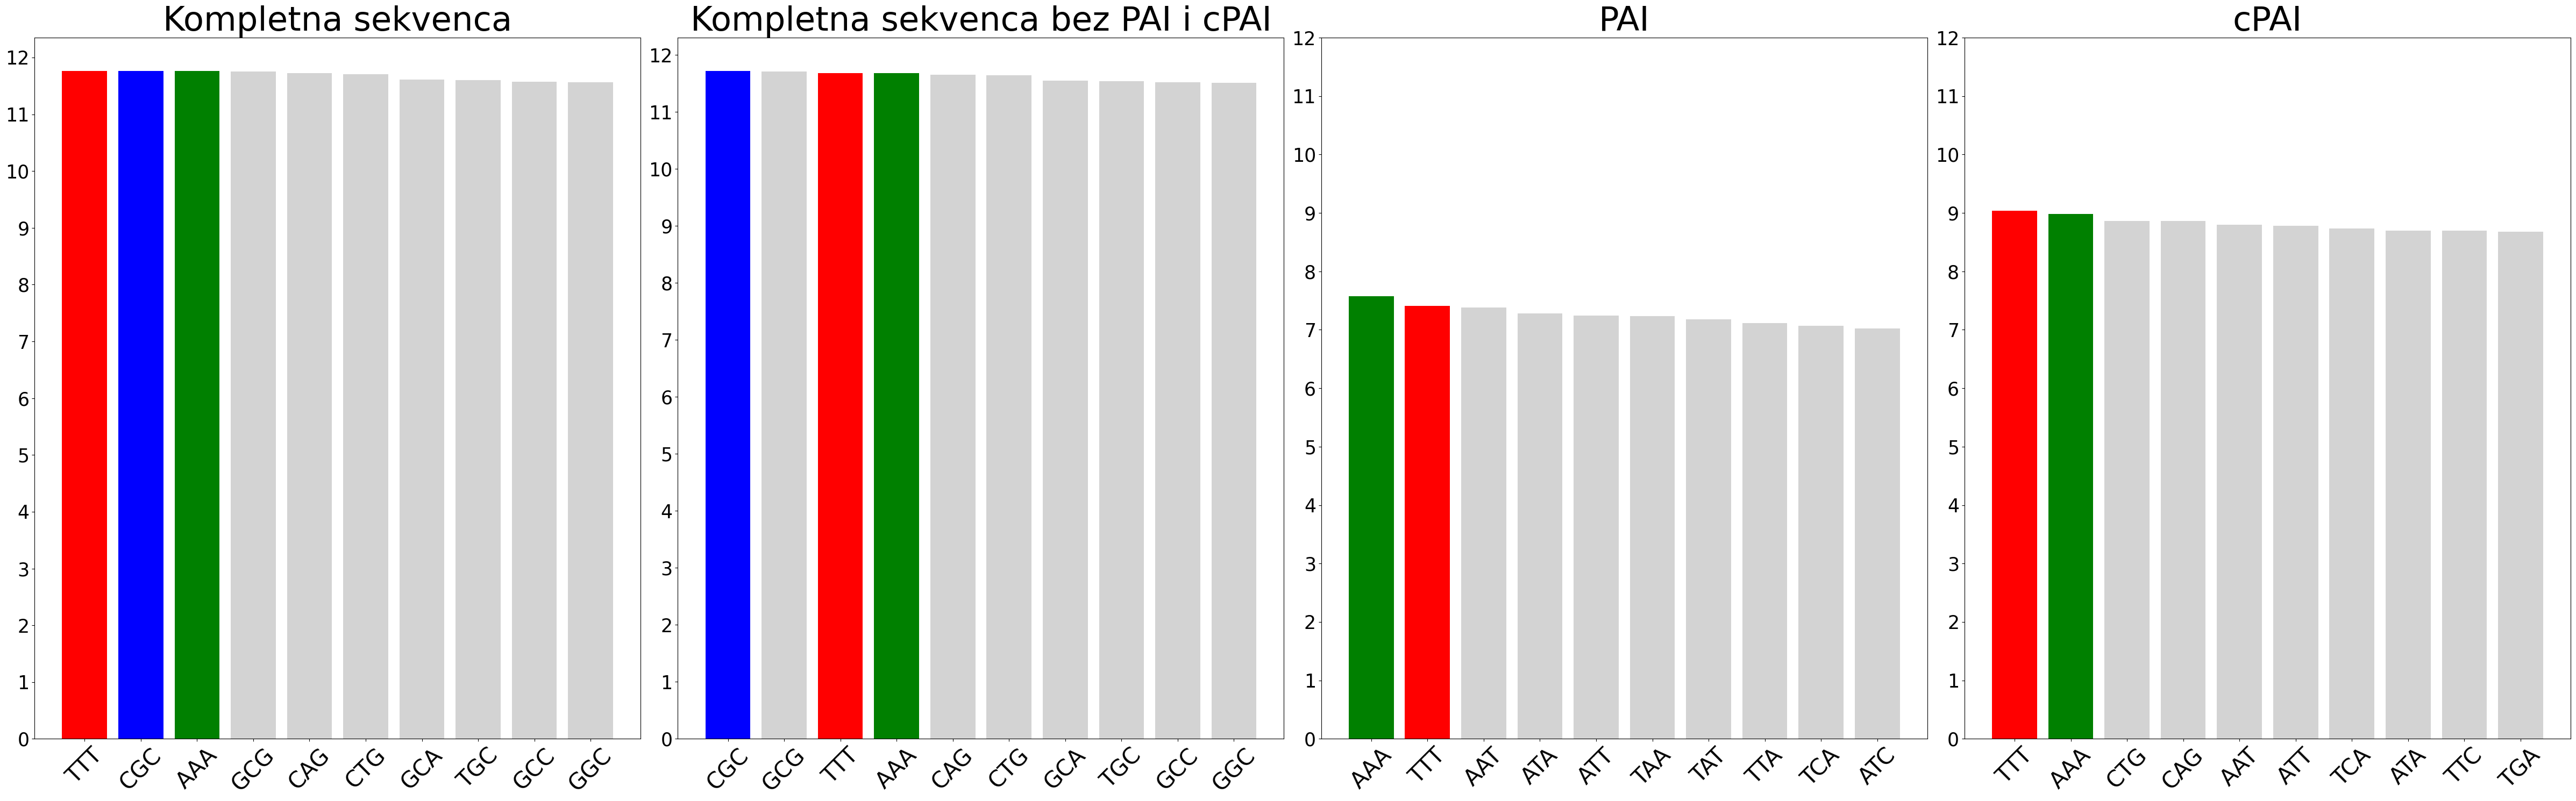

In [27]:
tabela = konacna_tabela.copy()

boje_kolona = {
    'TTT': 'red',
    'CGC': 'blue',
    'AAA': 'green',
    'ostale': 'lightgrey'
}

for genom in genoms:
    id_group = tabela[tabela['ID'] == genom]
    
    if len(id_group) == 1:
        redovi = 2
    else:
        redovi = len(id_group)

    fig, axs = plt.subplots(1, 4, figsize= (4 * len(id_group), 15))
    print(len(id_group))
    
    # podela podataka na tip "K" i ostale tipove
    tip_k = id_group[id_group['Tip'] == 'K']
    ostali_tipovi = id_group[id_group['Tip'] != 'K']

    max_value = 0

    for i, (index, row) in enumerate(tip_k.iterrows()):
        row_without_id_type = row.drop(['ID', 'Tip', "Pocetak", "Kraj", "Velicina"])
        row_without_id_type = row_without_id_type.astype(int)
        top5_values = row_without_id_type.nlargest(10)

        axs[i].bar(top5_values.index, np.log(top5_values), color=[boje_kolona.get(k, boje_kolona['ostale']) for k in top5_values.index])

        axs[i].set_title(f'Kompletna sekvenca', fontsize=45)

        max_value = max(max_value, np.max(np.log(row_without_id_type)))

    cPai = []
    if not ostali_tipovi.empty:
        for j, (index, row) in enumerate(ostali_tipovi.iterrows()):
            if(row['Tip'] != 'C'):
                if(row['Tip'] == 'P'):
                    i = 2
                    row_without_id_type = row.drop(['ID', 'Tip', "Pocetak", "Kraj", "Velicina"])
                    row_without_id_type = row_without_id_type.astype(int)
                    top5_values = row_without_id_type.nlargest(10)

                    axs[i].bar(top5_values.index, np.log(top5_values), color=[boje_kolona.get(k, boje_kolona['ostale']) for k in top5_values.index])

                    axs[i].set_title(f'PAI', fontsize=45)
                    max_value = max(max_value, np.max(np.log(row_without_id_type)))
                elif(row['Tip'] == 'R'):
                    i = 1
                    row_without_id_type = row.drop(['ID', 'Tip', "Pocetak", "Kraj", "Velicina"])
                    row_without_id_type = row_without_id_type.astype(int)
                    top5_values = row_without_id_type.nlargest(10)

                    axs[i].bar(top5_values.index, np.log(top5_values), color=[boje_kolona.get(k, boje_kolona['ostale']) for k in top5_values.index])

                    axs[i].set_title(f'Kompletna sekvenca bez PAI i cPAI', fontsize=45)
                    max_value = max(max_value, np.max(np.log(row_without_id_type)))
            else:
                row_without_id_type = row.drop(['ID', 'Tip', "Pocetak", "Kraj", "Velicina"])
                row_without_id_type = row_without_id_type.astype(int)
                cPai.append(row_without_id_type)        

    print(len(cPai))
    df = pd.DataFrame(cPai)

    suma_po_kolonama = df.sum()
    s = suma_po_kolonama.nlargest(10)

    axs[3].bar(s.index, np.log(s), color=[boje_kolona.get(k, boje_kolona['ostale']) for k in s.index])
    axs[3].set_title(f'cPAI', fontsize=45)

    ticks = np.arange(0, max_value + 1, 1)
    for ax in axs:
        ax.set_yticks(ticks)
        ax.tick_params(axis='x', labelsize=30, rotation=45)
        ax.tick_params(axis='y', labelsize=25)

    
    plt.tight_layout()
    plt.show()


# Crtanje NC_013366

In [ ]:
genoms = ['NC_013366']

2


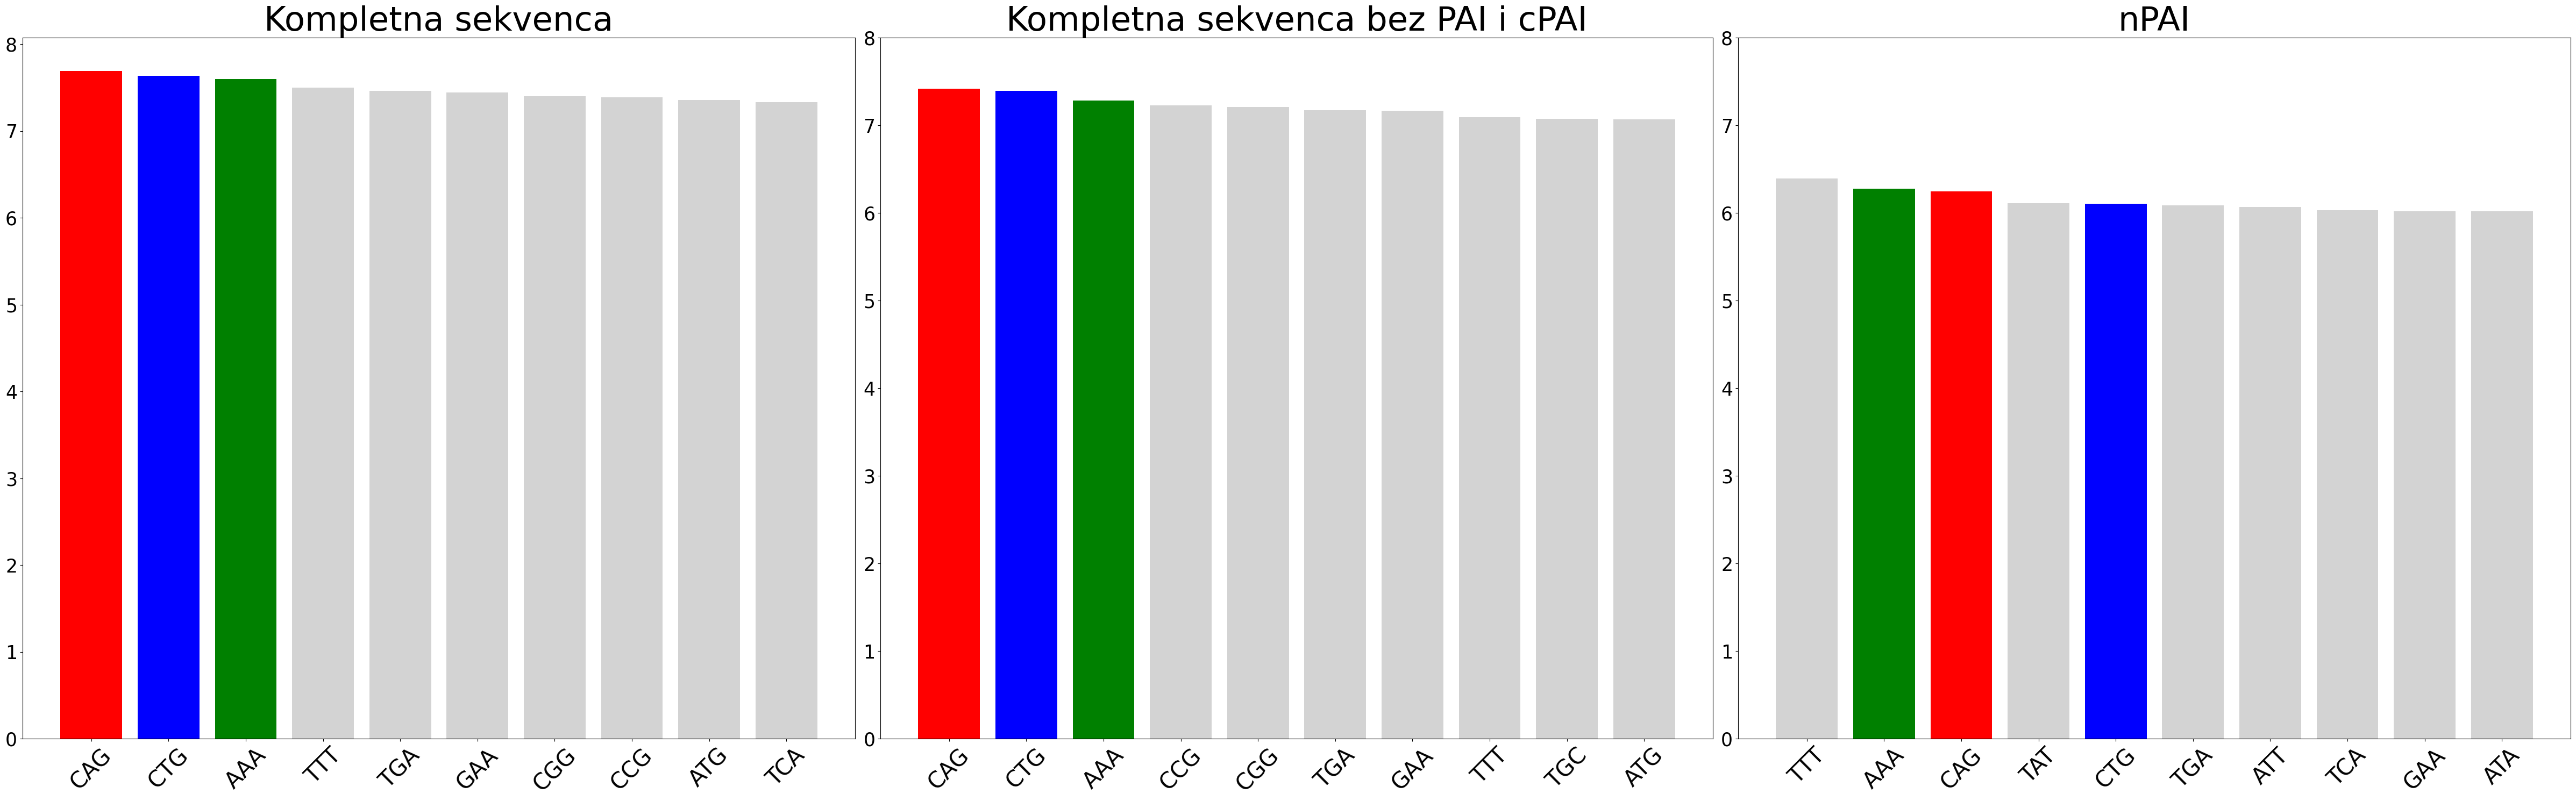

In [36]:
tabela = konacna_tabela.copy()

boje_kolona = {
    'CAG': 'red',
    'CTG': 'blue',
    'AAA': 'green',
    'ostale': 'lightgrey'
}

for genom in genoms:
    id_group = tabela[tabela['ID'] == genom]
    
    if len(id_group) == 1:
        redovi = 2
    else:
        redovi = len(id_group)

    fig, axs = plt.subplots(1, 3, figsize= (4 * 12, 15))
   
    # podela podataka na tip "K" i ostale tipove
    tip_k = id_group[id_group['Tip'] == 'K']
    ostali_tipovi = id_group[id_group['Tip'] != 'K']

    max_value = 0

    for i, (index, row) in enumerate(tip_k.iterrows()):
        row_without_id_type = row.drop(['ID', 'Tip', "Pocetak", "Kraj", "Velicina"])
        row_without_id_type = row_without_id_type.astype(int)
        top5_values = row_without_id_type.nlargest(10)

        axs[i].bar(top5_values.index, np.log(top5_values), color=[boje_kolona.get(k, boje_kolona['ostale']) for k in top5_values.index])

        axs[i].set_title(f'Kompletna sekvenca', fontsize=45)

        max_value = max(max_value, np.max(np.log(row_without_id_type)))

    nPai = []
    if not ostali_tipovi.empty:
        for j, (index, row) in enumerate(ostali_tipovi.iterrows()):
            if(row['Tip'] != 'N'):
                if(row['Tip'] == 'R'):
                    i = 1
                    row_without_id_type = row.drop(['ID', 'Tip', "Pocetak", "Kraj", "Velicina"])
                    row_without_id_type = row_without_id_type.astype(int)
                    top5_values = row_without_id_type.nlargest(10)

                    axs[i].bar(top5_values.index, np.log(top5_values), color=[boje_kolona.get(k, boje_kolona['ostale']) for k in top5_values.index])

                    axs[i].set_title(f'Kompletna sekvenca bez PAI i cPAI', fontsize=45)
                    max_value = max(max_value, np.max(np.log(row_without_id_type)))
            else:
                row_without_id_type = row.drop(['ID', 'Tip', "Pocetak", "Kraj", "Velicina"])
                row_without_id_type = row_without_id_type.astype(int)
                nPai.append(row_without_id_type)
                

    print(len(nPai))
    df = pd.DataFrame(nPai)

    suma_po_kolonama = df.sum()
    s = suma_po_kolonama.nlargest(10)

    axs[2].bar(s.index, np.log(s), color=[boje_kolona.get(k, boje_kolona['ostale']) for k in s.index])
    axs[2].set_title(f'nPAI', fontsize=45)

    ticks = np.arange(0, max_value + 1, 1)
    for ax in axs:
        ax.set_yticks(ticks)
        ax.tick_params(axis='x', labelsize=30, rotation=45)
        ax.tick_params(axis='y', labelsize=25)
    
    plt.tight_layout()
    plt.show()
